# Approximated k-hops Jaccard with GRAPE & HyperLogLog
The Approximated k-hops Jaccard algorithm implemented in [🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a powerful technique for estimating the the shared neighbours of two nodes considering $k$ transitive closures. By running graph convolutions of [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs), the algorithm provides an efficient and scalable approach to approximate the similarity measure while massively minimizing computational complexity.

This Jupyter notebook aims to explore the implementation and application of the approximated k-hops Jaccard algorithm using GRAPE and [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs). We will delve into the details of the algorithm, discuss its advantages and use cases, and provide practical examples of its application in graph processing and machine learning tasks.


## What is GRAPE
[🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![features in GRAPE](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

## What is a Jaccard similarity coefficient?
The Jaccard similarity coefficient, also known as the Jaccard index, is a measure of similarity between two sets. It quantifies the degree of overlap or similarity between the elements of the sets. The Jaccard similarity coefficient is defined as the size of the intersection of the sets divided by the size of the union of the sets.

Mathematically, the Jaccard similarity coefficient is computed as follows:
$$J(A, B) = \frac{\lvert A \cap B\rvert}{\lvert A \cup B\rvert}$$

where:

* $A$ and $B$ are sets
* $\cap$ denotes the intersection of the sets
* $\cup$ denotes the union of the sets
* $\lvert A \cap B\rvert$ represents the cardinality (number of elements) of the intersection of sets A and B

The resulting coefficient ranges from $0$ to $1$, where $0$ indicates no similarity or no common elements between the sets, and $1$ indicates complete similarity or perfect overlap between the sets.

The Jaccard similarity coefficient is widely used in various fields, including data mining, information retrieval, machine learning, and recommendation systems. It is particularly useful when dealing with binary or categorical data, where the presence or absence of elements is of interest.

### How is it used in graphs?
In graph analysis, the Jaccard similarity coefficient can be applied to measure the similarity between sets of neighbors of nodes in a graph. It provides a way to compare the local neighborhood structures of different nodes and can be used to identify similar nodes or clusters within a graph.

It is important to note that the Jaccard similarity coefficient is a simple and intuitive measure of similarity but has limitations. It does not consider the relative importance or frequency of elements within the sets and treats all elements equally. Additionally, it does not capture the magnitude of differences between sets, only their overlap. Therefore, it is not suitable for measuring the similarity between sets of numerical values.

### What is $k$-hops Jaccard?
The $k$-hops Jaccard similarity, also referred to as the $k$-hops Jaccard index, is a measure of similarity that quantifies the overlap between the neighboring nodes within a graph up to a specified distance, $k$. It provides insights into the similarity of node neighborhoods and captures the shared elements among nodes within a certain proximity.

To understand the concept of the $k$-hops Jaccard index, let's consider a graph where each node represents an entity, such as a user, item, or document, and the edges represent relationships or connections between these entities. The $k$-hops Jaccard index measures the similarity between the sets of neighboring nodes at distances up to $k$, which can be interpreted as the neighbors reachable within $k$ steps in the graph.

Formally, for two given nodes $v, u \in V$ in a graph, the $k$-hops Jaccard index is calculated as the ratio of the number of common neighboring nodes between $v$ and another node $u$, up to distance $k$, to the total number of distinct neighboring nodes of both nodes:

$$J_k(v, u) = \frac{\lvert \mathcal{N}_k(v) \cap \mathcal{N}_k(u)\rvert}{\lvert \mathcal{N}_k(v) \cup \mathcal{N}_k(u)\rvert}$$

where:

* $J_k(v, u)$ represents the k-hops Jaccard index between nodes $v$ and $u$
* $\mathcal{N}_k(v)$ denotes the set of neighboring nodes of node $v$ up to distance $k$
* $\mathcal{N}_k(u)$ denotes the set of neighboring nodes of node $u$ up to distance $k$

In other words, the numerator of the formula calculates the number of common neighbors between nodes $v$ and $u$ within the specified distance $k$, while the denominator represents the total number of distinct neighbors of both nodes.

The $k$-hops Jaccard index provides a measure of similarity that considers not only direct connections between nodes but also the connectivity patterns within a certain range. It captures the similarity of nodes based on their shared neighborhood structures, which can be valuable in various graph analysis tasks, such as community detection, recommendation systems, and link prediction.

By computing the $k$-hops Jaccard index for pairs of nodes within a graph, it is possible to identify nodes with similar local neighborhood structures, uncover cohesive communities, discover related entities, and perform other graph analysis tasks that leverage the notion of proximity and similarity among nodes.

#### Is exact $k$-hops Jaccard computational expensive?
Computing the exact $k$-hops Jaccard similarity between pairs of nodes in a graph can be computationally expensive, especially when dealing with large graphs and nodes with high degrees. The process involves exploring the neighborhoods of each pair of nodes up to a distance of $k$, which can become prohibitive for scalability in terms of time and computational resources.

The main challenge arises from the exponential growth in the number of nodes to consider as the distance $k$ increases. For a node $v$, the number of nodes in its neighborhood at distance $k$ grows exponentially with $k$. This exponential growth leads to an explosion in the number of pairwise comparisons required to compute the exact $k$-hops Jaccard index for all pairs of nodes.

When dealing with large-scale graphs with millions or billions of nodes and varying degrees of connectivity, the computational cost of computing the exact $k$-hops Jaccard index becomes impractical. Exploring all neighborhoods up to distance $k$ for each pair of nodes would involve traversing an enormous number of edges and nodes, resulting in a significant computational burden.

Additionally, nodes with very high degrees pose a specific challenge. These nodes, often referred to as "hubs," have a large number of neighbors, making the neighborhood exploration even more time-consuming. The high degree of hubs leads to an increase in the size of the neighborhood sets, resulting in a higher number of intersections and unions to compute when calculating the Jaccard index.

As a result, exact computation of the k-hops Jaccard index becomes infeasible for large graphs or scenarios where real-time or near-real-time analysis is required. Therefore, alternative approaches are needed to approximate the k-hops Jaccard index efficiently and effectively.

## What is HyperLogLog?
[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) is a probabilistic data structure designed for estimating the cardinality, or the number of distinct elements, in a set. It provides an efficient and scalable approach to estimate cardinalities, especially in scenarios where the cardinality of the set is extremely large. The implementation of HyperLogLog [available here](https://github.com/LucaCappelletti94/hyperloglog-rs) supports key operations such as adding elements to the set, merging sets, estimating the set cardinalities and, very relevantly to our case, estimating the Jaccard index between two sets.

### Background and Motivation
Traditional methods for exact cardinality estimation, such as maintaining a set or using a bitmap, can consume a significant amount of memory, especially when dealing with large datasets. Storing individual elements or using a bit to represent each element quickly becomes impractical in terms of memory requirements.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) addresses this challenge by offering a compact representation of the set's cardinality with a controlled amount of memory. It achieves this by exploiting the properties of hash functions and probabilistic counting.

### Basic Idea and Working Principle
The basic idea behind [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) is to estimate the cardinality of a set by observing the distribution of hashed values. It leverages the fact that the leading zeros in the binary representation of a hash result follow a specific pattern when uniformly distributed.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) achieves its estimation by dividing the input set into multiple subsets, each processed independently. It applies a hash function to each element in the set, and based on the resulting hash values, determines the maximum number of leading zeros seen in any hash. The maximum leading zeros are used to estimate the cardinality.

### [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) Structure
The [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) data structure consists of an array of registers, where each register stores a value representing the maximum number of leading zeros observed in the hash results. The number of registers is determined by the chosen precision parameter, which controls the accuracy of the estimation. Common values for the precision parameter $p$ range from $4$ to $16$, with derived number of registers $m=2^p$ ranging from $16$ to $65536$. Commonly, each register is represented by either $5$ or $6$ bits.

### Estimation Accuracy and Error
The accuracy of the [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) estimation depends on the chosen precision parameter. Increasing the precision results in a more accurate estimation but requires additional memory. The error rate, or the difference between the estimated and actual cardinality, is typically within a few percentage points.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) provides a reliable estimation technique for large cardinalities while maintaining a fixed memory footprint, making it well-suited for big data and distributed computing environments.

### Applications of HyperLogLog
[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) has found numerous applications in various domains. Some notable applications include:

* Web analytics: Estimating the number of unique visitors to a website or counting distinct IP addresses.
* Database systems: Approximating the number of distinct values in large datasets without explicitly storing all values.
* Network monitoring: Tracking the number of unique network flows or estimating the size of IP address pools.
* Machine learning: Handling large feature spaces and estimating the number of distinct features.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) provides a powerful and efficient approach to cardinality estimation, enabling scalable analysis and processing of large datasets while effectively managing memory consumption.

## How to implement an efficient $k$-hops Jaccard estimator
In the context of the GRAPE algorithm and the use of [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) counters, the $k$-hops Jaccard index is approximated efficiently by employing [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) counters to estimate the cardinality of neighboring nodes' sets. This approximation allows for scalable computation of the $k$-hops Jaccard index in large-scale graphs, enabling efficient graph analytics and machine learning tasks.

The key idea behind the efficient $k$-hops Jaccard estimator is to leverage the properties of HyperLogLog counters and graph convolutions to estimate the Jaccard similarity between neighboring nodes up to $k$ hops. The approach involves the following steps:

* Initialize HyperLogLog counters: Create a HyperLogLog counter for each node in the graph. The counters will be used to approximate the neighborhood sets of the nodes.
* Perform $k$ iterations of graph convolutions: Iterate $k$ times, performing graph convolutions to update the HyperLogLog counters. During each iteration, the counters are updated based on the neighboring nodes' counters, incorporating the information from the previous iteration.
* Estimate Jaccard similarity: Once the $k$ iterations are completed, the estimated Jaccard similarity between any two nodes can be calculated by comparing their corresponding HyperLogLog counters.

```python
# Initialize HyperLogLog counters
counters = [HyperLogLog(PRECISION, BITS) for _ in range(graph.number_of_nodes())]
previous_counters = counters.copy()

# Perform k iterations of graph convolutions
for _ in range(k):
    # Iterate over nodes
    for node_id, counter in enumerate(counters):
        # We initialize a new counter
        new_counter = HyperLogLog(PRECISION, BITS)
        
        # And we iterate over this nodes neighbours counters 
        for neighbor in graph.get_neighbors(node_id):
            # We update the new counter with the previous counter of the neighbor
            new_counter |= previous_counters[neighbor]
        
        # We update the counter of the current node
        counter = new_counter | previous_counters[node_id]
    
    # We swap the counters
    counters, previous_counters = previous_counters, counters

# Now, the previous_counters in the last iteration contain the
# estimated cardinality of the neighborhood of each node
# up to k steps and we can use them for k-hops Jaccard estimation
```



## Some pratical experiments
In this section, we will conduct practical experiments using the approximated $k$-hops Jaccard algorithm on three different graphs: Human Phenotype Ontology, Homo Sapiens STRING PPI, and KGCOVID19. The goal is to evaluate how well the algorithm approximates the exact Jaccard similarity for $k=1$ and analyze the histograms for $k=2$ and $k=3$. We will emphasize that as $k$ increases, the exact Jaccard calculation becomes rapidly impractical, highlighting the importance of the approximated approach.

### Graph Selection
* [Human Phenotype Ontology](https://hpo.jax.org/app/): The Human Phenotype Ontology (HPO) is a widely used ontology that represents human phenotypic abnormalities and their relationships. It captures information about various diseases and their associated phenotypes. The graph represents connections between phenotypic abnormalities based on shared features.
* [Homo Sapiens STRING PPI](https://string-db.org/): The Homo Sapiens STRING Protein-Protein Interaction (PPI) graph contains information about protein-protein interactions in humans. It represents connections between proteins based on experimental and computational evidence.
* [KGCOVID19](https://pubmed.ncbi.nlm.nih.gov/32839776/): KGCOVID19 is a knowledge graph that integrates diverse data related to the COVID-19 pandemic. It contains information about various entities, including diseases, drugs, genes, and clinical trials, along with their relationships.

### Evaluating Approximated Jaccard for $k=1$
For each of the selected graphs, we will evaluate how well the approximated $k$-hops Jaccard algorithm estimates the exact Jaccard similarity for $k=1$. We will calculate the exact Jaccard similarity between neighboring nodes and compare it with the estimated Jaccard similarity obtained from the algorithm.

By analyzing the similarity scores and comparing them with the exact values, we can assess the accuracy and reliability of the approximated approach for $k=1$. We will present statistical measures, such as mean absolute error or root mean square error, to quantitatively evaluate the estimation quality.

### Histograms for $k=2$ and $k=3$
Next, we will focus on exploring the histograms of Jaccard similarities for $k=2$ and $k=3$. Since calculating the exact Jaccard similarity for higher values of k becomes impractical due to computational complexity, the approximated approach provides a viable alternative to gain insights into the similarity patterns.

By plotting histograms of the Jaccard similarities for $k=2$ and $k=3$, we can observe the distribution of similarity scores between neighboring nodes. This analysis helps us understand the degree of similarity between nodes at different hop distances and identify clusters or patterns within the graphs.

We will visually compare the histograms obtained from the approximated approach with the theoretical expectations for the exact Jaccard similarity distribution. This comparison will allow us to assess the effectiveness of the approximated algorithm in capturing the underlying similarity patterns in the graphs.

We start by retrieving the graphs from GRAPE graph retrieval system:

In [4]:
%%time
from grape.datasets.kgobo import HP
from grape.datasets.string import HomoSapiens
from grape.datasets.kghub import KGCOVID19

CPU times: user 68.8 ms, sys: 20.2 ms, total: 89 ms
Wall time: 88.7 ms


We retrieve from GRAPE the HyperBall-based k-hops Jaccard model.

In [5]:
from grape import models

HyperBallJaccard = models.HyperBallJaccard

To clean up the code, we define a function that will be used to display the results of the experiments.

In [32]:
from IPython.display import display, Markdown
from grape import Graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm.auto import trange

def experiment(graph: Graph):
    """Display the experiment results for a given graph."""

    display(Markdown(f"## Experiments on {graph.get_name()}"))
    display(Markdown(f"We use the {graph.get_name()} graph with {graph.get_number_of_nodes()} nodes and {graph.get_number_of_directed_edges()} edges."))
    # First portion, experiments for k=1
    display(Markdown(f"### Approximated Jaccard for k=1"))
    display(Markdown(f"We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision for bits=6."))

    results = []
    # We compute the exact Jaccard for all edges in the graph.
    start = time()
    exact_jaccard = graph.get_jaccard_coefficient_scores()
    time_required_for_exact_jaccard = time() - start

    display(Markdown(f"Time required for computing the exact Jaccard: {time_required_for_exact_jaccard:.6f} seconds."))

    for precision in trange(6, 14, leave=False):
        model = HyperBallJaccard(number_of_hops=1, precision=precision, bits=6)
        start = time()
        model.fit(graph)
        approximated_jaccard = model.predict(graph)
        time_required_for_approximated_jaccard = time() - start
        error_mse = ((exact_jaccard - approximated_jaccard) ** 2).mean()
        error_mae = np.abs(exact_jaccard - approximated_jaccard).mean()
        results.append({
            "precision": precision,
            "k": 1,
            "error_mse": error_mse,
            "error_mae": error_mae,
            "time": time_required_for_approximated_jaccard
        })
    
    dataframe = pd.DataFrame(results)
    display(Markdown(f"The following table shows the results for the different values of precision."))
    display(dataframe)
    display(Markdown(f"The following figure shows the results for the different values of precision."))
    plt.figure(figsize=(10, 5))
    plt.plot(dataframe["precision"], dataframe["error_mse"], label="MSE")
    plt.plot(dataframe["precision"], dataframe["error_mae"], label="MAE")
    plt.xlabel("Precision")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
    display(Markdown(f"The following figure shows the time required for the different values of precision."))
    plt.figure(figsize=(10, 5))
    plt.plot(dataframe["precision"], dataframe["time"])
    plt.xlabel("Precision")
    plt.ylabel("Time (seconds)")
    plt.show()
    
    display(Markdown(f"### Approximated Jaccard for k=2 and k=3"))
    # Second portion, experiments for k=2 and k=3
    for k in [2, 3]:
        for precision in trange(6, 14, leave=False):
            model = HyperBallJaccard(number_of_hops=k, precision=precision, bits=6)
            start = time()
            model.fit(graph)
            approximated_jaccard = model.predict(graph)
            time_required_for_approximated_jaccard = time() - start
            results.append({
                "precision": precision,
                "k": k,
                "time": time_required_for_approximated_jaccard
            })
    
    # We create plots showing the different time requirements for the different values of k
    # for different values of precision. On the same plot, we show the time required for the
    # different k-hops, and the different precisions on the x-axis, while time on the y-axis.
    dataframe = pd.DataFrame(results)
    display(Markdown(f"The following plots show the time requirements for different precisions and number of k hops."))

    plt.figure(figsize=(10, 5))
    for k in [1, 2, 3]:
        plt.plot(dataframe[dataframe["k"] == k]["precision"], dataframe[dataframe["k"] == k]["time"], label=f"k={k}")
    plt.xlabel("Precision")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.show()

    # We show side by side an histograph with the approximated Jaccard for k=1 and the exact one.
    display(Markdown(f"The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1."))
    plt.figure(figsize=(10, 5))
    plt.hist(exact_jaccard, bins=100, label="Exact Jaccard", alpha=0.5)
    model = HyperBallJaccard(number_of_hops=1, precision=12, bits=6)
    model.fit(graph)
    approximated_jaccard = model.predict(graph)
    plt.hist(approximated_jaccard, bins=100, label="k=1", alpha=0.5)
    plt.xlabel("k-hops Jaccard")
    plt.ylabel("Number of edges")
    plt.legend()
    plt.show()
    
    # Finally, we show an histogram showing the values of the approximated Jaccard for k=1, k=2 and k=3.
    display(Markdown(f"The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3."))
    plt.figure(figsize=(10, 5))
    plt.hist(exact_jaccard, bins=100, label="Exact Jaccard", alpha=0.5)
    for k in [1, 2, 3]:
        model = HyperBallJaccard(number_of_hops=k, precision=12, bits=6)
        model.fit(graph)
        approximated_jaccard = model.predict(graph)
        plt.hist(approximated_jaccard, bins=100, label=f"k={k}", alpha=0.5)
    plt.xlabel("k-hops Jaccard")
    plt.ylabel("Number of edges")
    plt.legend()
    plt.show()

In [33]:
%%time
hp = HP()

CPU times: user 156 ms, sys: 2.56 ms, total: 159 ms
Wall time: 27 ms


## Experiments on HP

We use the HP graph with 31854 nodes and 134167 edges.

### Approximated Jaccard for k=1

We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision for bits=6.

Time required for computing the exact Jaccard: 0.001761 seconds.

  0%|          | 0/8 [00:00<?, ?it/s]

The following table shows the results for the different values of precision.

,precision,k,error_mse,error_mae,time
0,6,1,0.046033,0.165079,0.003242
1,7,1,0.043743,0.162028,0.005270
2,8,1,0.042903,0.161110,0.010725
3,9,1,0.042510,0.160656,0.020626
4,10,1,0.042316,0.160469,0.039086
5,11,1,0.042234,0.160412,0.078511
6,12,1,0.042165,0.160332,0.159253
7,13,1,0.042097,0.160265,0.315349


The following figure shows the results for the different values of precision.

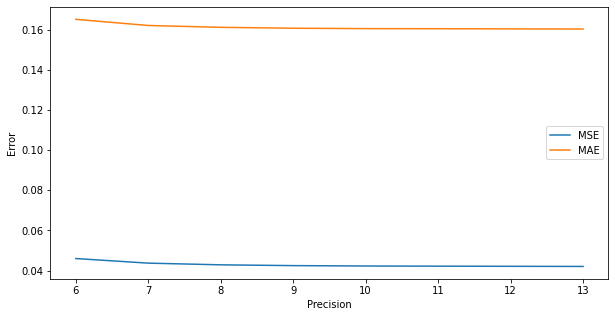

The following figure shows the time required for the different values of precision.

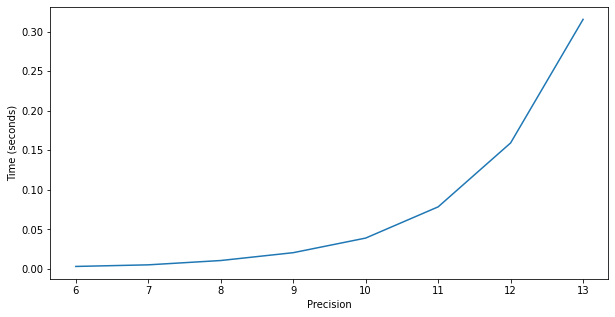

### Approximated Jaccard for k=2 and k=3

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

The following plots show the time requirements for different precisions and number of k hops.

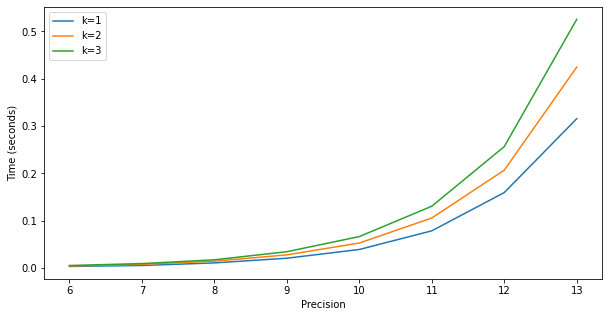

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1.

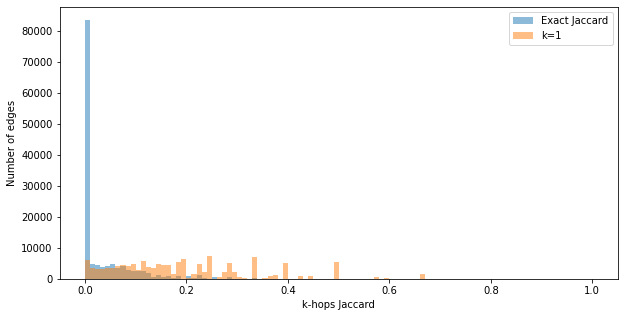

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3.

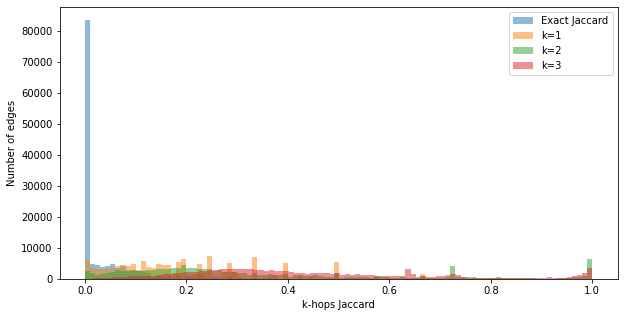

In [34]:
experiment(hp)

We observe that for a graph extremely sparse like HPO, the approximation is not very good. This is due to the fact that the graph is extremely sparse. This means that the number of nodes that we need to explore to get to a certain distance is very high. This is a problem that is not present in the other two graphs.

Let's bump it up a notch, and we move to STRING Homo Sapiens:

In [35]:
%%time
string = HomoSapiens()

CPU times: user 34 s, sys: 1.32 s, total: 35.3 s
Wall time: 1min 11s


## Experiments on HomoSapiens

We use the HomoSapiens graph with 19566 nodes and 11938498 edges.

### Approximated Jaccard for k=1

We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision for bits=6.

Time required for computing the exact Jaccard: 2.014556 seconds.

  0%|          | 0/8 [00:00<?, ?it/s]

The following table shows the results for the different values of precision.

,precision,k,error_mse,error_mae,time
0,6,1,0.047434,0.197541,0.170696
1,7,1,0.019382,0.123730,0.320738
2,8,1,0.009643,0.085514,0.627429
3,9,1,0.001948,0.034622,1.239763
4,10,1,0.000564,0.018400,2.458316
5,11,1,0.000167,0.010152,4.853841
6,12,1,0.000068,0.006505,9.629727
7,13,1,0.000031,0.004373,19.472815


The following figure shows the results for the different values of precision.

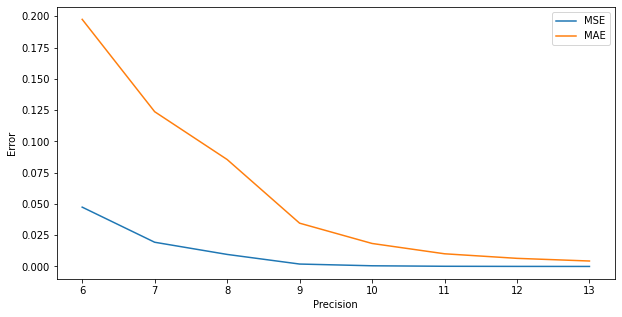

The following figure shows the time required for the different values of precision.

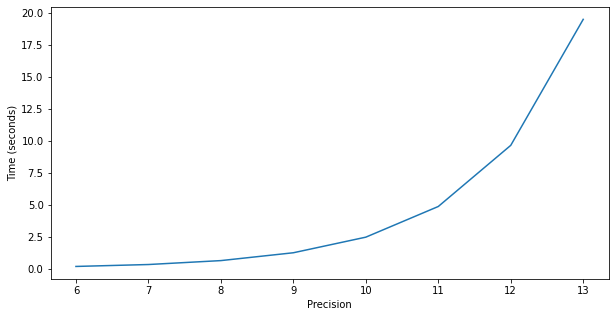

### Approximated Jaccard for k=2 and k=3

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

The following plots show the time requirements for different precisions and number of k hops.

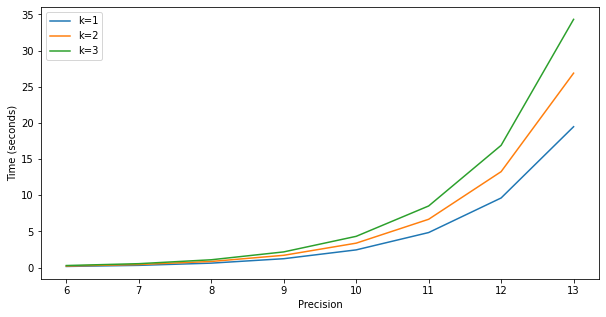

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1.

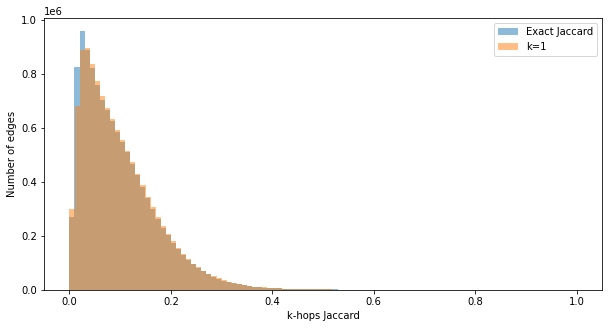

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3.

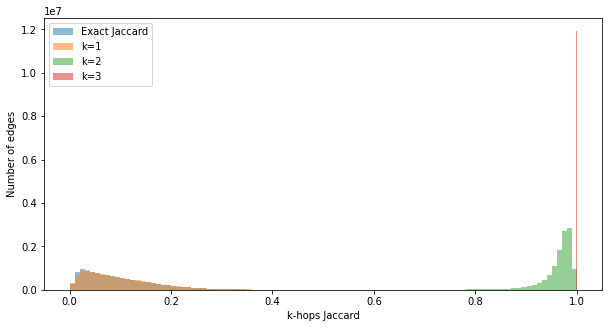

In [36]:
experiment(string)

In [37]:
%%time
kgcovid19 = KGCOVID19()

CPU times: user 1min 9s, sys: 5.11 s, total: 1min 15s
Wall time: 4min 40s


## Experiments on KGCOVID19

We use the KGCOVID19 graph with 574778 nodes and 36509132 edges.

### Approximated Jaccard for k=1

We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision for bits=6.

Time required for computing the exact Jaccard: 5.039388 seconds.

  0%|          | 0/8 [00:00<?, ?it/s]

The following table shows the results for the different values of precision.

,precision,k,error_mse,error_mae,time
0,6,1,0.022571,0.109279,0.631887
1,7,1,0.009301,0.066999,1.254572
2,8,1,0.004367,0.042979,2.419945
3,9,1,0.001425,0.018909,4.788905
4,10,1,0.000903,0.011510,9.215323
5,11,1,0.000756,0.008152,17.850767
6,12,1,0.000708,0.006446,35.191057
7,13,1,0.000692,0.005517,71.060369


The following figure shows the results for the different values of precision.

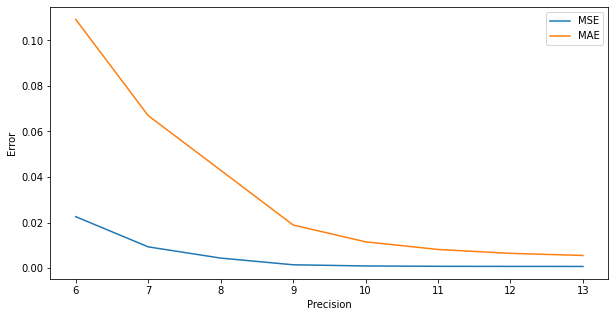

The following figure shows the time required for the different values of precision.

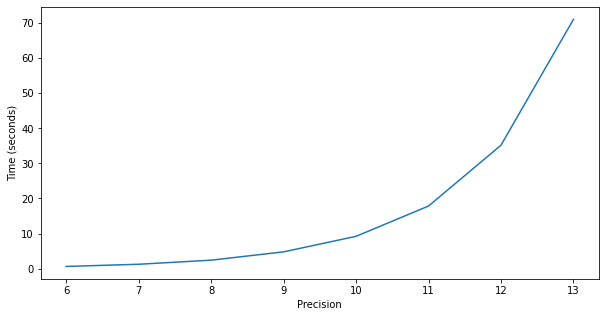

### Approximated Jaccard for k=2 and k=3

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

The following plots show the time requirements for different precisions and number of k hops.

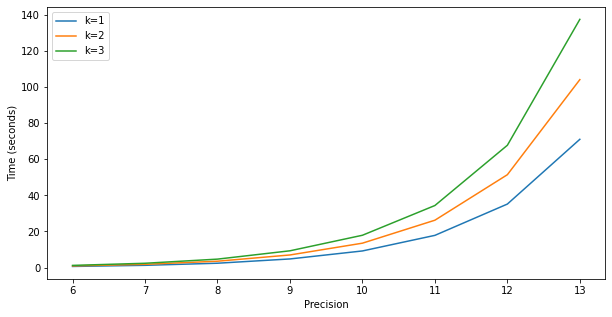

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1.

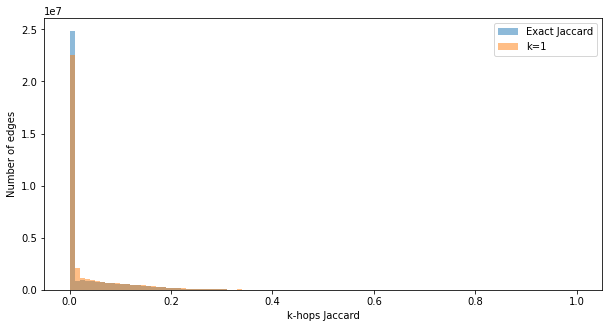

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3.

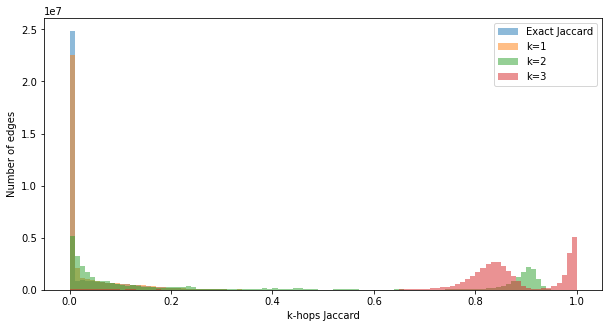

In [38]:
experiment(kgcovid19)

## Conclusive notes
In conclusion, our experiments on the different graphs demonstrated the general effectiveness of the approximated $k$-hops Jaccard algorithm, except for the case of the HPO graph.

For $k=1$, we analyzed the accuracy of the approximated Jaccard using different precision values. The results showed that higher precision values led to lower errors, indicating that one can pay more memory for better approximation quality. Overall, the approximated k-hops Jaccard algorithm provides a practical solution for estimating Jaccard similarity in large graphs, where computing the exact Jaccard becomes computationally expensive.

[You can learn more about HyperLogLog here](https://github.com/LucaCappelletti94/hyperloglog-rs).

Don't forget to ⭐ GRAPE!